# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from eloscore import eloscore

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [6]:
all_final_elo_score_file_paths = glob.glob("./pilot*/**/*final_elo_score*.csv", recursive=True)

In [7]:
all_final_elo_score_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/tube_test_final_elo_score_cages_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_1_2_3_4_5_

In [8]:
len(all_final_elo_score_file_paths)

11

In [9]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv
['3.1' '3.2' '3.3' '3.4' '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '

In [10]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [11]:
combined_final_elo_score_df.head()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
0,1,1.1,1062.2,pilot_1,C57,tube_test,2.0
1,1,1.2,927.1,pilot_1,C57,tube_test,3.0
2,1,1.3,775.7,pilot_1,C57,tube_test,4.0
3,1,1.4,1235.0,pilot_1,C57,tube_test,1.0
4,2,2.1,1122.6,pilot_1,C57,tube_test,2.0


In [12]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [13]:
combined_final_elo_score_df.tail()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
207,5,5.4,1019.7,pilot_3,CD1,urine_marking,1.0
208,6,6.1,980.3,pilot_3,CD1,urine_marking,4.0
209,6,6.2,990.3,pilot_3,CD1,urine_marking,3.0
210,6,6.3,1029.1,pilot_3,CD1,urine_marking,1.0
211,6,6.4,1000.3,pilot_3,CD1,urine_marking,2.0


In [14]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_score': "{}_final_elo_score".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='outer', left_on=["cage", "subject_id", "cohort", "strain"], right_on = ["cage", "subject_id", "cohort", "strain"])
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=["cage", "subject_id", "cohort", "strain"], keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

In [15]:
merged_final_elo_score_df.head(n=50)

,cage,subject_id,urine_marking_final_elo_score,cohort,strain,urine_marking_rank,reward_competition_final_elo_score,reward_competition_rank,home_cage_observation_final_elo_score,home_cage_observation_rank,tube_test_final_elo_score,tube_test_rank
0,1,1.1,1019.2,pilot_1,C57,1.0,1097.1,1.0,NaN,NaN,1062.2,2.0
1,1,1.2,992.0,pilot_1,C57,3.0,1063.9,2.0,NaN,NaN,927.1,3.0
2,1,1.3,971.9,pilot_1,C57,4.0,901.8,4.0,NaN,NaN,775.7,4.0
3,1,1.4,1016.9,pilot_1,C57,2.0,937.2,3.0,NaN,NaN,1235.0,1.0
4,2,2.1,1037.4,pilot_1,C57,1.0,1071.7,1.0,NaN,NaN,1122.6,2.0
5,2,2.2,972.0,pilot_1,C57,4.0,918.3,4.0,NaN,NaN,947.8,3.0
6,2,2.3,1009.2,pilot_1,C57,2.0,973.7,3.0,NaN,NaN,780.7,4.0
7,2,2.4,981.4,pilot_1,C57,3.0,1036.3,2.0,NaN,NaN,1148.9,1.0
8,3,3.1,1010.6,pilot_1,CD1,1.0,1131.2,1.0,1185.0,1.0,784.5,4.0
9,3,3.2,999.4,pilot_1,CD1,3.0,954.6,3.0,889.6,4.0,1228.3,1.0


In [16]:
sorted(merged_final_elo_score_df.columns)

['cage',
 'cohort',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'strain',
 'subject_id',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [17]:
sorted_columns = ['cage',
 'cohort',
 'strain',
 'subject_id',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [18]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted_columns]

In [19]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Urine Marking Assay

In [20]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [21]:
urine_marking_file_paths

['./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_elo_score_history_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-08-08/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-07-11_2022-08-08.csv',
 './pilot_3/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-09-12_2022-09-16/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-09-12_2022-09-16.csv']

In [22]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [23]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [24]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

- For even rows, the left pee spots correspond to the subject's pee spots

In [25]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [26]:
even_urine_marking_df.columns

Index(['index', 'total_match_number', 'subject_id', 'agent_id',
       'original_elo_score', 'updated_elo_score', 'win_draw_loss',
       'subject_ranking', 'agent_ranking', 'spot_number_difference', 'loser',
       'animal_id', 'date', 'session_number', 'spot_number_tie', 'ties',
       'spot_percent_tie', 'right_number_of_spots', 'sorted_animal_id',
       'winner', 'session_number_difference', 'match',
       'spot_number_then_percent_tie', 'spot_percent_difference',
       'left_number_of_spots', 'cage', 'processed_cage_number',
       'experiment_type', 'strain', 'cohort', 'notes'],
      dtype='object')

In [27]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [28]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [29]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [30]:
even_urine_marking_df.head()

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,spot_number_difference,loser,animal_id,...,match,spot_number_then_percent_tie,spot_percent_difference,left_number_of_spots,cage,processed_cage_number,experiment_type,strain,cohort,notes
0,1,0,1,1.1,1000.0,0.5,1,4.0,1.3,"['1.1', '1.3']",...,1.1 v 1.3,True,200.000000,4.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
2,2,2,2,1.4,1010.0,1.0,1,6.0,1.2,"['1.2', '1.4']",...,1.2 v 1.4,False,200.000000,0.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
4,3,4,3,1.2,990.3,0.5,4,5.0,1.1,"['1.1', '1.2']",...,1.1 v 1.2,True,34.482759,12.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
6,4,6,4,1.4,1019.7,1.0,1,10.0,1.3,"['1.3', '1.4']",...,1.3 v 1.4,False,200.000000,0.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
8,5,8,5,1.1,1000.3,0.5,2,3.0,1.4,"['1.1', '1.4']",...,1.1 v 1.4,True,18.181818,18.0,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [31]:
odd_urine_marking_df.head()

,matching_index,index,total_match_number,right_subject_id,right_elo_score,win_draw_loss,right_ranking,spot_number_difference,loser,animal_id,...,session_number_difference,match,spot_number_then_percent_tie,spot_percent_difference,cage,processed_cage_number,experiment_type,strain,cohort,notes
1,1,1,1,1.3,1000.0,0.5,2,4.0,1.3,"['1.1', '1.3']",...,NaN,1.1 v 1.3,True,200.000000,CAGE1,1,urine_marking,C57,pilot_1,NaN
3,2,3,2,1.2,990.0,0.0,4,6.0,1.2,"['1.2', '1.4']",...,0.0,1.2 v 1.4,False,200.000000,CAGE1,1,urine_marking,C57,pilot_1,NaN
5,3,5,3,1.1,999.7,0.5,3,5.0,1.1,"['1.1', '1.2']",...,1.0,1.1 v 1.2,True,34.482759,CAGE1,1,urine_marking,C57,pilot_1,NaN
7,4,7,4,1.3,990.3,0.0,3,10.0,1.3,"['1.3', '1.4']",...,0.0,1.3 v 1.4,False,200.000000,CAGE1,1,urine_marking,C57,pilot_1,NaN
9,5,9,5,1.4,1019.1,0.5,1,3.0,1.4,"['1.1', '1.4']",...,1.0,1.1 v 1.4,True,18.181818,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [32]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [33]:
cols_to_use

['right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'matching_index']

In [34]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [35]:
urine_marking_left_right

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,spot_number_difference,loser,animal_id,...,cage,processed_cage_number,experiment_type,strain,cohort,notes,right_elo_score,right_number_of_spots,right_ranking,right_subject_id
0,1,0,1,1.1,1000.0,0.5,1,4.0,1.3,"['1.1', '1.3']",...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1000.0,0.0,2,1.3
1,2,2,2,1.4,1010.0,1.0,1,6.0,1.2,"['1.2', '1.4']",...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.0,6.0,4,1.2
2,3,4,3,1.2,990.3,0.5,4,5.0,1.1,"['1.1', '1.2']",...,CAGE1,1,urine_marking,C57,pilot_1,NaN,999.7,17.0,3,1.1
3,4,6,4,1.4,1019.7,1.0,1,10.0,1.3,"['1.3', '1.4']",...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.3,10.0,3,1.3
4,5,8,5,1.1,1000.3,0.5,2,3.0,1.4,"['1.1', '1.4']",...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1019.1,15.0,1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,282,2,6.3,1010.0,1.0,1,35.0,6.4,"['6.3', '6.4']",...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,990.0,22.0,4,6.4
142,143,284,3,6.3,1019.7,1.0,1,29.0,6.1,"['6.1', '6.3']",...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,990.3,31.0,3,6.1
143,144,286,4,6.4,990.3,0.5,4,5.0,6.2,"['6.2', '6.4']",...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,999.7,10.0,2,6.2
144,145,288,5,6.4,1000.3,1.0,2,25.0,6.1,"['6.1', '6.4']",...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,980.3,26.0,4,6.1


In [36]:
sorted(urine_marking_left_right.columns)

['animal_id',
 'cage',
 'cohort',
 'date',
 'experiment_type',
 'index',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'loser',
 'match',
 'matching_index',
 'notes',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'sorted_animal_id',
 'spot_number_difference',
 'spot_number_then_percent_tie',
 'spot_number_tie',
 'spot_percent_difference',
 'spot_percent_tie',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner']

In [37]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [38]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [39]:
urine_marking_left_right.head()

,experiment_type,cohort,cage,processed_cage_number,strain,date,match,winner,loser,ties,...,left_ranking,left_subject_id,right_elo_score,right_number_of_spots,right_ranking,right_subject_id,session_number,session_number_difference,total_match_number,win_draw_loss
0,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.1 v 1.3,1.1,1.3,NaN,...,1,1.1,1000.0,0.0,2,1.3,1.0,NaN,1,0.5
1,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.2 v 1.4,1.4,1.2,NaN,...,1,1.4,990.0,6.0,4,1.2,1.0,0.0,2,1.0
2,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.1 v 1.2,1.2,1.1,NaN,...,4,1.2,999.7,17.0,3,1.1,2.0,1.0,3,0.5
3,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.3 v 1.4,1.4,1.3,NaN,...,1,1.4,990.3,10.0,3,1.3,2.0,0.0,4,1.0
4,urine_marking,pilot_1,CAGE1,1,C57,2022-05-24,1.1 v 1.4,1.1,1.4,NaN,...,2,1.1,1019.1,15.0,1,1.4,3.0,1.0,5,0.5


In [40]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

/tmp/ipykernel_642/328799236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
/tmp/ipykernel_642/328799236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)


In [41]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [42]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [43]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [44]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [45]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [46]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [47]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [48]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [49]:
cols_to_use


['cage',
 'cohort',
 'date',
 'experiment_type',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'loser',
 'match',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner',
 'left_subject_id']

In [50]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [51]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [52]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [53]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [54]:
sorted(urine_and_elo_score_df.columns)

['cage',
 'cohort',
 'date',
 'experiment_type',
 'home_cage_observation_elo_score_difference',
 'home_cage_observation_rank_difference',
 'left_cage',
 'left_cohort',
 'left_elo_score',
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_number_of_spots',
 'left_ranking',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_strain',
 'left_subject_id',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',
 'loser',
 'match',
 'pee_spot_difference',
 'processed_cage_number',
 'reward_competition_elo_score_difference',
 'reward_competition_rank_difference',
 'right_cage',
 'right_cohort',
 'right_elo_score',
 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_number_of_spots',
 'right_ranking',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_strain',
 'right_subject_id'

In [55]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [56]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [57]:
urine_and_elo_score_df

,cohort,cage,processed_cage_number,strain,date,winner,loser,ties,left_subject_id,left_elo_score,...,right_home_cage_observation_rank,right_reward_competition_final_elo_score,right_reward_competition_rank,right_tube_test_final_elo_score,right_tube_test_rank,right_urine_marking_final_elo_score,right_urine_marking_rank,session_number,session_number_difference,total_match_number
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,NaN,1.1,1000.0,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,1.0,NaN,1
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,tie,1.1,1019.2,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,5.0,1.0,9
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,NaN,1.4,1019.7,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,2.0,0.0,4
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,tie,1.4,1028.3,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,4.0,0.0,8
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,tie,1.2,990.3,...,NaN,901.8,4.0,775.7,4.0,971.9,4.0,3.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,pilot_3,CAGE6,6,CD1,2022-09-13,6.3,6.1,NaN,6.3,1019.7,...,NaN,NaN,NaN,1137.7,1.0,NaN,NaN,2.0,1.0,3
196,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,NaN,6.4,1000.3,...,NaN,NaN,NaN,NaN,NaN,980.3,4.0,3.0,1.0,5
197,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,NaN,6.4,1000.3,...,NaN,NaN,NaN,1137.7,1.0,NaN,NaN,3.0,1.0,5
198,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,NaN,6.4,1000.3,...,NaN,NaN,NaN,NaN,NaN,980.3,4.0,3.0,1.0,5


In [58]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [59]:
urine_and_elo_score_df.dropna(axis=1)

,cohort,cage,processed_cage_number,strain,date,winner,loser,left_subject_id,left_elo_score,left_ranking,right_subject_id,right_elo_score,right_ranking,left_number_of_spots,right_number_of_spots,pee_spot_difference,session_number,total_match_number
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,1.1,1000.0,1,1.3,1000.0,2,4.0,0.0,4.0,1.0,1
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,1.1,1019.2,2,1.3,971.9,4,43.0,0.0,43.0,5.0,9
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,1.4,1019.7,1,1.3,990.3,3,0.0,10.0,-10.0,2.0,4
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,1.4,1028.3,1,1.3,981.1,3,0.0,8.0,-8.0,4.0,8
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,1.2,990.3,4,1.3,990.3,3,0.0,0.0,0.0,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,pilot_3,CAGE6,6,CD1,2022-09-13,6.3,6.1,6.3,1019.7,1,6.1,990.3,3,2.0,31.0,-29.0,2.0,3
196,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,6.4,1000.3,2,6.1,980.3,4,1.0,26.0,-25.0,3.0,5
197,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,6.4,1000.3,2,6.1,980.3,4,1.0,26.0,-25.0,3.0,5
198,pilot_3,CAGE6,6,CD1,2022-09-16,6.4,6.1,6.4,1000.3,2,6.1,980.3,4,1.0,26.0,-25.0,3.0,5


In [60]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

Index(['home_cage_observation_elo_score_difference',
       'home_cage_observation_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank', 'reward_competition_elo_score_difference',
       'reward_competition_rank_difference',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward_competition_final_elo_score',
       'right_reward_competition_rank', 'right_tube_test_final_elo_score',
       'right_tube_test_rank', 'right_urine_marking_final_elo_score',
       'right_urine_marking_rank', 'session_number_difference', 'ties',
       'tube_test_elo_score_difference', 'tube_test_rank_difference'],
      dtype='object')

# Plotting

In [61]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [62]:
urine_and_elo_score_df.columns

Index(['cohort', 'cage', 'processed_cage_number', 'strain', 'date', 'winner',
       'loser', 'ties', 'left_subject_id', 'left_elo_score', 'left_ranking',
       'right_subject_id', 'right_elo_score', 'right_ranking',
       'left_number_of_spots', 'right_number_of_spots', 'pee_spot_difference',
       'tube_test_elo_score_difference',
       'home_cage_observation_elo_score_difference',
       'reward_competition_elo_score_difference', 'tube_test_rank_difference',
       'home_cage_observation_rank_difference',
       'reward_competition_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward

In [63]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [64]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

(array([26., 25., 17.,  7.,  2.,  6.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  0. ,   9.8,  19.6,  29.4,  39.2,  49. ,  58.8,  68.6,  78.4,
         88.2,  98. , 107.8, 117.6, 127.4, 137.2, 147. , 156.8, 166.6,
        176.4, 186.2, 196. , 205.8, 215.6, 225.4, 235.2, 245. , 254.8,
        264.6, 274.4, 284.2, 294. ]),
 <BarContainer object of 30 artists>)

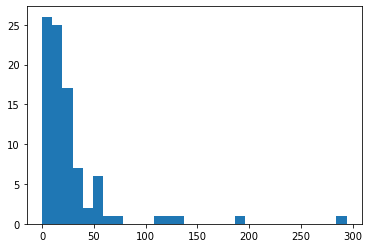

In [65]:
plt.hist(c57_df["winner_number_of_spots"], bins=30)

(array([14.,  7., 13., 11.,  1.,  5.,  5.,  4.,  4.,  1.,  4.,  1.,  2.,
         1.,  0.,  3.,  1.,  2.,  1.,  4.,  2.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        , 14.93333333, 15.86666667, 16.8       , 17.73333333,
        18.66666667, 19.6       , 20.53333333, 21.46666667, 22.4       ,
        23.33333333, 24.26666667, 25.2       , 26.13333333, 27.06666667,
        28.        ]),
 <BarContainer object of 30 artists>)

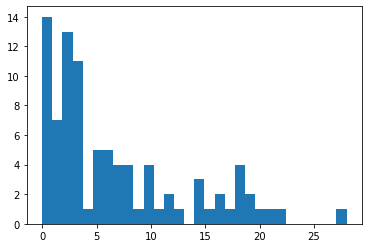

In [66]:
plt.hist(c57_df["loser_number_of_spots"], bins=30)

In [67]:
bins = 30

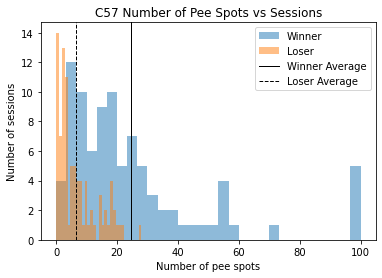

In [68]:
plt.hist(c57_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(c57_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(c57_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(c57_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("C57 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [69]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

In [70]:
bins = 30

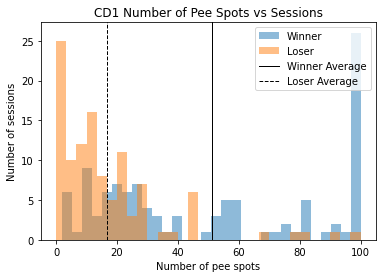

In [71]:
plt.hist(cd1_df["adjusted_winner_number_of_spots"], bins, alpha=0.5, label='Winner')
plt.hist(cd1_df["adjusted_loser_number_of_spots"], bins, alpha=0.5, label='Loser')
plt.axvline(cd1_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(cd1_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")
plt.title("CD1 Number of Pee Spots vs Sessions")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/cd1_pee_spots.png")
plt.show()

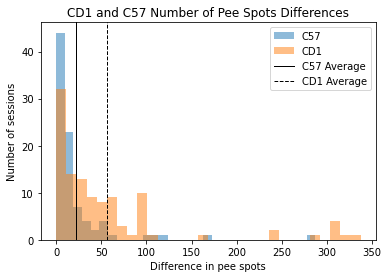

In [72]:
plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/pee_spot_difference.png")

plt.show()

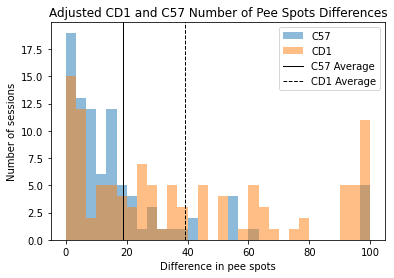

In [73]:
plt.hist(c57_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("Adjusted CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/adjusted_pee_spot_difference.png")

plt.show()

## Combining all the pair wise

In [74]:
all_pairwise_file_paths = glob.glob("./pilot_*/**/*pair*.csv", recursive=True)

In [75]:
all_pairwise_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/pilot_1_tube_test_grouped_by_pairs_cage_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/pilot_1_home_cage_observation_grouped_by_pairs_cage_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/pilot_1_urine_marking_grouped_by_pairs_cage_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/pilot_2_tube_test_grouped_by_pairs_cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_1_2_3_4_5_6_date_2012-08-11_2022-08-11/pilot_2_home_cage_observation_grouped_by_pairs_cage_1_2_3_4_5_6_date_2012-08-11_2022-08-11.csv',
 './pilot_2/proc/elo_score

In [76]:
protocols_list = ["urine", "tube", "home_cage"]

In [77]:
protocol_to_all_df = defaultdict(list)
for protocol in protocols_list:
    for file_path in all_pairwise_file_paths:
        if protocol in file_path:
            protocol_to_all_df[protocol].append(pd.read_csv(file_path))

In [78]:
# protocol_to_concatted_df = defaultdict(dict)
all_protocol_df_list = []
for k, v in protocol_to_all_df.items():
    
#     protocol_to_concatted_df[k] = pd.concat(v)
    all_protocol_df_list.append(pd.concat(v).reset_index(drop=True))

In [79]:
all_protocol_df_list[0]["tuple_animal_id"][0]

"('1.1', '1.2')"

In [80]:
# all_protocol_df_list[0]

all_protocol_df_list[0][all_protocol_df_list[0]["tuple_animal_id"] == "('1.1', '1.2')"]

,Unnamed: 0,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,uma_averaged_loser
0,0,"('1.1', '1.2')",69.0,10.5,1,pilot_1,C57,58.5,147.169811,False,False,False,1.1,1.2
24,0,"('1.1', '1.2')",14.0,28.0,1,pilot_2,C57,14.0,66.666667,False,False,False,1.2,1.1
60,0,"('1.1', '1.2')",1.0,1.0,1,pilot_3,C57,0.0,0.000000,True,True,True,1.2,1.1


In [81]:
all_protocol_df_list[1]

,Unnamed: 0,tt_tuple_animal_id,tt_winner,tt_loser,processed_cage_number,cohort,tt_averaged_winner,tt_averaged_loser,tt_winner_count,tt_loser_count,tt_count_difference,tt_match_count,tt_percent_win,tt_percentage_tie
0,0,"('1.1', '1.2')","['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....","['1.2', '1.2', '1.2', '1.1', '1.2', '1.2', '1....",1,pilot_1,1.1,1.2,13,1,12,14,0.928571,False
1,1,"('1.1', '1.3')","['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....","['1.1', '1.3', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.1,1.3,13,1,12,14,0.928571,False
2,2,"('1.1', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1....",1,pilot_1,1.4,1.1,14,0,14,14,1.000000,False
3,3,"('1.2', '1.3')","['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....","['1.3', '1.2', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.2,1.3,13,1,12,14,0.928571,False
4,4,"('1.2', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.2', '1.2', '1.2', '1.2', '1.2', '1.2', '1....",1,pilot_1,1.4,1.2,14,0,14,14,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,31,"('6.1', '6.3')","['6.3', '6.1', '6.1', '6.1', '6.1', '6.1', '6....","['6.1', '6.3', '6.3', '6.3', '6.3', '6.3', '6....",6,pilot_3,6.1,6.3,7,1,6,8,0.875000,False
92,32,"('6.1', '6.4')","['6.1', '6.1', '6.1', '6.1', '6.1', '6.1', '6....","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....",6,pilot_3,6.1,6.4,8,0,8,8,1.000000,False
93,33,"('6.2', '6.3')","['6.2', '6.3', '6.3', '6.2', '6.3', '6.2', '6....","['6.3', '6.2', '6.2', '6.3', '6.2', '6.3', '6....",6,pilot_3,6.2,6.3,4,4,0,8,0.500000,True
94,34,"('6.2', '6.4')","['6.2', '6.2', '6.2', '6.2', '6.2', '6.2', '6....","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....",6,pilot_3,6.2,6.4,8,0,8,8,1.000000,False


In [82]:
merged_all_protocol_pairwise_df = pd.merge(all_protocol_df_list[0], all_protocol_df_list[1],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['tt_tuple_animal_id','cohort'])

In [83]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[2],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['hco_tuple_animal_id','cohort'])

In [84]:
merged_all_protocol_pairwise_df.sort_values(['cohort', "tuple_animal_id"]).to_csv("./proc/merged_all_protocol_pairwise_df.csv")

In [98]:
merged_all_protocol_pairwise_df["hco_percentage_tie"].unique()

array([nan, False, True], dtype=object)

In [99]:
merged_all_protocol_pairwise_df.dropna(subset=["hco_percentage_tie"])

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
12,12,"('3.1', '3.2')",17.000000,12.000000,3,pilot_1,CD1,5.000000,34.482759,True,...,"['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', ...",3.0,3.1,3.2,20.0,0.0,20.0,20.0,1.000000,False
13,13,"('3.1', '3.3')",24.000000,0.000000,3,pilot_1,CD1,24.000000,200.000000,False,...,['f'],3.0,3.1,3.3,1.0,0.0,1.0,1.0,1.000000,True
14,14,"('3.1', '3.4')",27.000000,23.000000,3,pilot_1,CD1,4.000000,16.000000,True,...,"['c', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",3.0,3.1,3.4,10.0,0.0,10.0,10.0,1.000000,False
15,15,"('3.2', '3.3')",51.000000,0.000000,3,pilot_1,CD1,51.000000,200.000000,False,...,"['c', 'c', 'c']",3.0,3.2,3.3,2.0,1.0,1.0,3.0,0.666667,True
16,16,"('3.2', '3.4')",10.000000,28.000000,3,pilot_1,CD1,18.000000,94.736842,False,...,"['c', 'c']",3.0,3.4,3.2,2.0,0.0,2.0,2.0,1.000000,True
17,17,"('3.3', '3.4')",46.666667,34.666667,3,pilot_1,CD1,12.000000,29.508197,False,...,"['f', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']",3.0,3.3,3.4,5.0,4.0,1.0,9.0,0.555556,True
18,18,"('4.1', '4.2')",47.666667,44.000000,4,pilot_1,CD1,3.666667,8.000000,True,...,"['f', 'f', 'c', 'c', 'f', 'f', 'c', 'f', 'c', ...",4.0,4.1,4.2,11.0,3.0,8.0,14.0,0.785714,False
19,19,"('4.1', '4.3')",10.000000,0.000000,4,pilot_1,CD1,10.000000,200.000000,False,...,['c'],4.0,4.3,4.1,1.0,0.0,1.0,1.0,1.000000,True
20,20,"('4.1', '4.4')",26.000000,137.000000,4,pilot_1,CD1,111.000000,136.196319,False,...,"['f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'c', ...",4.0,4.4,4.1,28.0,0.0,28.0,28.0,1.000000,False
22,22,"('4.2', '4.4')",5.000000,70.000000,4,pilot_1,CD1,65.000000,173.333333,False,...,"['f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",4.0,4.4,4.2,18.0,0.0,18.0,18.0,1.000000,False


In [100]:
dropped_hco = merged_all_protocol_pairwise_df.dropna(subset=["hco_percentage_tie"])

In [85]:
merged_all_protocol_pairwise_df.columns

Index(['Unnamed: 0_x', 'tuple_animal_id', 'left_number_of_spots',
       'right_number_of_spots', 'processed_cage_number_x', 'cohort', 'strain',
       'uma_number_difference', 'uma_percent_difference', 'uma_number_tie',
       'uma_percent_tie', 'uma_number_then_percent_tie', 'uma_averaged_winner',
       'uma_averaged_loser', 'Unnamed: 0_y', 'tt_tuple_animal_id', 'tt_winner',
       'tt_loser', 'processed_cage_number_y', 'tt_averaged_winner',
       'tt_averaged_loser', 'tt_winner_count', 'tt_loser_count',
       'tt_count_difference', 'tt_match_count', 'tt_percent_win',
       'tt_percentage_tie', 'Unnamed: 0', 'hco_tuple_animal_id', 'hco_winner',
       'hco_loser', 'hco_action', 'processed_cage_number',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie'],
      dtype='object')

In [95]:
merged_all_protocol_pairwise_df[(merged_all_protocol_pairwise_df["hco_averaged_winner"] == merged_all_protocol_pairwise_df["uma_averaged_winner"]) & (~merged_all_protocol_pairwise_df["uma_number_then_percent_tie"]) & (~merged_all_protocol_pairwise_df["hco_percentage_tie"])]

TypeError: bad operand type for unary ~: 'float'

In [106]:
dropped_hco[(dropped_hco["hco_averaged_winner"] == dropped_hco["uma_averaged_winner"]) & (~dropped_hco["uma_number_then_percent_tie"]) & (~dropped_hco["hco_percentage_tie"]) & (dropped_hco["strain"] == "CD1")]

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
13,13,"('3.1', '3.3')",24.000000,0.000000,3,pilot_1,CD1,24.00,200.000000,False,...,['f'],3.0,3.1,3.3,1.0,0.0,1.0,1.0,1.000000,True
15,15,"('3.2', '3.3')",51.000000,0.000000,3,pilot_1,CD1,51.00,200.000000,False,...,"['c', 'c', 'c']",3.0,3.2,3.3,2.0,1.0,1.0,3.0,0.666667,True
16,16,"('3.2', '3.4')",10.000000,28.000000,3,pilot_1,CD1,18.00,94.736842,False,...,"['c', 'c']",3.0,3.4,3.2,2.0,0.0,2.0,2.0,1.000000,True
17,17,"('3.3', '3.4')",46.666667,34.666667,3,pilot_1,CD1,12.00,29.508197,False,...,"['f', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']",3.0,3.3,3.4,5.0,4.0,1.0,9.0,0.555556,True
20,20,"('4.1', '4.4')",26.000000,137.000000,4,pilot_1,CD1,111.00,136.196319,False,...,"['f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'c', ...",4.0,4.4,4.1,28.0,0.0,28.0,28.0,1.000000,False
22,22,"('4.2', '4.4')",5.000000,70.000000,4,pilot_1,CD1,65.00,173.333333,False,...,"['f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",4.0,4.4,4.2,18.0,0.0,18.0,18.0,1.000000,False
23,23,"('4.3', '4.4')",30.500000,147.250000,4,pilot_1,CD1,116.75,131.364276,False,...,"['f', 'c', 'f', 'f', 'c', 'f', 'f', 'f', 'f', ...",4.0,4.4,4.3,17.0,0.0,17.0,17.0,1.000000,False
45,21,"('4.2', '4.3')",199.000000,6.500000,4,pilot_2,CD1,192.50,187.347932,False,...,"['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', ...",4.0,4.2,4.3,60.0,0.0,60.0,60.0,1.000000,False
52,28,"('5.2', '5.4')",7.000000,12.500000,5,pilot_2,CD1,5.50,56.410256,False,...,"['f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ...",5.0,5.4,5.2,43.0,0.0,43.0,43.0,1.000000,False
53,29,"('5.3', '5.4')",53.500000,15.000000,5,pilot_2,CD1,38.50,112.408759,False,...,"['f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', ...",5.0,5.3,5.4,54.0,24.0,30.0,78.0,0.692308,True


In [104]:
dropped_hco[(dropped_hco["hco_averaged_winner"] != dropped_hco["uma_averaged_winner"]) & (~dropped_hco["uma_number_then_percent_tie"]) & (~dropped_hco["hco_percentage_tie"]) & (dropped_hco["strain"] == "CD1")]

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
19,19,"('4.1', '4.3')",10.0,0.0,4,pilot_1,CD1,10.0,200.000000,False,...,['c'],4.0,4.3,4.1,1.0,0.0,1.0,1.0,1.000000,True
42,18,"('4.1', '4.2')",14.5,149.5,4,pilot_2,CD1,135.0,164.634146,False,...,"['f', 'f', 'f', 'f', 'c', 'c', 'c', 'f', 'f', ...",4.0,4.1,4.2,27.0,27.0,0.0,54.0,0.500000,True
48,24,"('5.1', '5.2')",7.5,143.0,5,pilot_2,CD1,135.5,180.066445,False,...,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', ...",5.0,5.1,5.2,20.0,0.0,20.0,20.0,1.000000,False
50,26,"('5.1', '5.4')",227.0,49.0,5,pilot_2,CD1,178.0,128.985507,False,...,"['c', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ...",5.0,5.4,5.1,28.0,15.0,13.0,43.0,0.651163,True
57,33,"('6.2', '6.3')",17.5,27.5,6,pilot_2,CD1,10.0,44.444444,False,...,"['f', 'f', 'f', 'f', 'c', 'f', 'c', 'c', 'c']",6.0,6.2,6.3,7.0,2.0,5.0,9.0,0.777778,False
59,35,"('6.3', '6.4')",54.0,10.0,6,pilot_2,CD1,44.0,137.500000,False,...,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ...",6.0,6.4,6.3,46.0,0.0,46.0,46.0,1.000000,False
81,21,"('4.2', '4.3')",5.0,172.0,4,pilot_3,CD1,167.0,188.700565,False,...,"['f', 'c', 'c', 'f', 'c', 'c', 'c', 'c', 'f', ...",4.0,4.2,4.3,6.0,5.0,1.0,11.0,0.545455,True
83,23,"('4.3', '4.4')",24.0,60.0,4,pilot_3,CD1,36.0,85.714286,False,...,"['f', 'c', 'f', 'c']",4.0,4.3,4.4,2.0,2.0,0.0,4.0,0.500000,True
88,28,"('5.2', '5.4')",136.0,44.0,5,pilot_3,CD1,92.0,102.222222,False,...,"['c', 'c', 'c', 'f', 'f', 'f', 'c', 'f', 'f', ...",5.0,5.4,5.2,14.0,11.0,3.0,25.0,0.560000,True


In [94]:
merged_all_protocol_pairwise_df[(merged_all_protocol_pairwise_df["tt_averaged_winner"] != merged_all_protocol_pairwise_df["uma_averaged_winner"]) & (~merged_all_protocol_pairwise_df["uma_number_then_percent_tie"]) & (~merged_all_protocol_pairwise_df["tt_percentage_tie"]) & (merged_all_protocol_pairwise_df["strain"] == "CD1")]

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
13,13,"('3.1', '3.3')",24.0,0.00,3,pilot_1,CD1,24.00,200.000000,False,...,['f'],3.0,3.1,3.3,1.0,0.0,1.0,1.0,1.000000,True
16,16,"('3.2', '3.4')",10.0,28.00,3,pilot_1,CD1,18.00,94.736842,False,...,"['c', 'c']",3.0,3.4,3.2,2.0,0.0,2.0,2.0,1.000000,True
19,19,"('4.1', '4.3')",10.0,0.00,4,pilot_1,CD1,10.00,200.000000,False,...,['c'],4.0,4.3,4.1,1.0,0.0,1.0,1.0,1.000000,True
20,20,"('4.1', '4.4')",26.0,137.00,4,pilot_1,CD1,111.00,136.196319,False,...,"['f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'c', ...",4.0,4.4,4.1,28.0,0.0,28.0,28.0,1.000000,False
22,22,"('4.2', '4.4')",5.0,70.00,4,pilot_1,CD1,65.00,173.333333,False,...,"['f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",4.0,4.4,4.2,18.0,0.0,18.0,18.0,1.000000,False
23,23,"('4.3', '4.4')",30.5,147.25,4,pilot_1,CD1,116.75,131.364276,False,...,"['f', 'c', 'f', 'f', 'c', 'f', 'f', 'f', 'f', ...",4.0,4.4,4.3,17.0,0.0,17.0,17.0,1.000000,False
42,18,"('4.1', '4.2')",14.5,149.50,4,pilot_2,CD1,135.00,164.634146,False,...,"['f', 'f', 'f', 'f', 'c', 'c', 'c', 'f', 'f', ...",4.0,4.1,4.2,27.0,27.0,0.0,54.0,0.500000,True
45,21,"('4.2', '4.3')",199.0,6.50,4,pilot_2,CD1,192.50,187.347932,False,...,"['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', ...",4.0,4.2,4.3,60.0,0.0,60.0,60.0,1.000000,False
47,23,"('4.3', '4.4')",25.5,6.50,4,pilot_2,CD1,19.00,118.750000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,28,"('5.2', '5.4')",7.0,12.50,5,pilot_2,CD1,5.50,56.410256,False,...,"['f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ...",5.0,5.4,5.2,43.0,0.0,43.0,43.0,1.000000,False


In [92]:
merged_all_protocol_pairwise_df[(merged_all_protocol_pairwise_df["tt_averaged_winner"] != merged_all_protocol_pairwise_df["uma_averaged_winner"]) & (~merged_all_protocol_pairwise_df["uma_number_then_percent_tie"]) & (~merged_all_protocol_pairwise_df["tt_percentage_tie"]) & (merged_all_protocol_pairwise_df["strain"] == "C57")]

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
8,8,"('2.1', '2.4')",49.0,19.0,2,pilot_1,C57,30.0,88.235294,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,"('2.2', '2.3')",3.0,12.0,2,pilot_1,C57,9.0,120.000000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,4,"('1.2', '1.4')",9.5,24.5,1,pilot_2,C57,15.0,88.235294,False,...,"['c', 'c', 'c', 'f', 'c', 'f', 'c']",1.0,1.2,1.4,6.0,1.0,5.0,7.0,0.857143,False
64,4,"('1.2', '1.4')",8.0,70.0,1,pilot_3,C57,62.0,158.974359,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,8,"('2.1', '2.4')",16.0,188.0,2,pilot_3,C57,172.0,168.627451,False,...,"['c', 'f', 'c', 'f', 'c', 'f', 'c', 'c', 'c']",2.0,2.1,2.4,9.0,0.0,9.0,9.0,1.000000,False
70,10,"('2.2', '2.4')",7.0,294.0,2,pilot_3,C57,287.0,190.697674,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,12,"('3.1', '3.2')",15.0,0.0,3,pilot_3,C57,15.0,200.000000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,13,"('3.1', '3.3')",9.0,3.0,3,pilot_3,C57,6.0,100.000000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,16,"('3.2', '3.4')",25.0,18.0,3,pilot_3,C57,7.0,32.558140,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,17,"('3.3', '3.4')",55.0,1.0,3,pilot_3,C57,54.0,192.857143,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
merged_all_protocol_pairwise_df[(merged_all_protocol_pairwise_df["tt_averaged_winner"] != merged_all_protocol_pairwise_df["uma_averaged_winner"]) & (~merged_all_protocol_pairwise_df["uma_number_then_percent_tie"]) & (~merged_all_protocol_pairwise_df["tt_percentage_tie"]) & (merged_all_protocol_pairwise_df["strain"] == "CD1")]

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
13,13,"('3.1', '3.3')",24.0,0.00,3,pilot_1,CD1,24.00,200.000000,False,...,['f'],3.0,3.1,3.3,1.0,0.0,1.0,1.0,1.000000,True
16,16,"('3.2', '3.4')",10.0,28.00,3,pilot_1,CD1,18.00,94.736842,False,...,"['c', 'c']",3.0,3.4,3.2,2.0,0.0,2.0,2.0,1.000000,True
19,19,"('4.1', '4.3')",10.0,0.00,4,pilot_1,CD1,10.00,200.000000,False,...,['c'],4.0,4.3,4.1,1.0,0.0,1.0,1.0,1.000000,True
20,20,"('4.1', '4.4')",26.0,137.00,4,pilot_1,CD1,111.00,136.196319,False,...,"['f', 'f', 'c', 'f', 'f', 'f', 'c', 'f', 'c', ...",4.0,4.4,4.1,28.0,0.0,28.0,28.0,1.000000,False
22,22,"('4.2', '4.4')",5.0,70.00,4,pilot_1,CD1,65.00,173.333333,False,...,"['f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",4.0,4.4,4.2,18.0,0.0,18.0,18.0,1.000000,False
23,23,"('4.3', '4.4')",30.5,147.25,4,pilot_1,CD1,116.75,131.364276,False,...,"['f', 'c', 'f', 'f', 'c', 'f', 'f', 'f', 'f', ...",4.0,4.4,4.3,17.0,0.0,17.0,17.0,1.000000,False
42,18,"('4.1', '4.2')",14.5,149.50,4,pilot_2,CD1,135.00,164.634146,False,...,"['f', 'f', 'f', 'f', 'c', 'c', 'c', 'f', 'f', ...",4.0,4.1,4.2,27.0,27.0,0.0,54.0,0.500000,True
45,21,"('4.2', '4.3')",199.0,6.50,4,pilot_2,CD1,192.50,187.347932,False,...,"['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', ...",4.0,4.2,4.3,60.0,0.0,60.0,60.0,1.000000,False
47,23,"('4.3', '4.4')",25.5,6.50,4,pilot_2,CD1,19.00,118.750000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,28,"('5.2', '5.4')",7.0,12.50,5,pilot_2,CD1,5.50,56.410256,False,...,"['f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ...",5.0,5.4,5.2,43.0,0.0,43.0,43.0,1.000000,False


In [87]:
merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["tt_averaged_winner"] != merged_all_protocol_pairwise_df["uma_averaged_winner"]]#[["tt_averaged_winner", "uma_averaged_winner"]]#.dropna(subset=["tt_averaged_winner", "uma_averaged_winner"])

,Unnamed: 0_x,tuple_animal_id,left_number_of_spots,right_number_of_spots,processed_cage_number_x,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,...,hco_action,processed_cage_number,hco_averaged_winner,hco_averaged_loser,hco_winner_count,hco_loser_count,hco_count_difference,hco_match_count,hco_percent_win,hco_percentage_tie
2,2,"('1.1', '1.4')",18.000000,15.00,1,pilot_1,C57,3.000000,18.181818,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"('1.2', '1.3')",0.000000,0.00,1,pilot_1,C57,0.000000,0.000000,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"('1.2', '1.4')",12.000000,8.00,1,pilot_1,C57,4.000000,40.000000,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,"('2.1', '2.4')",49.000000,19.00,2,pilot_1,C57,30.000000,88.235294,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,"('2.2', '2.3')",3.000000,12.00,2,pilot_1,C57,9.000000,120.000000,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11,"('2.3', '2.4')",16.500000,13.00,2,pilot_1,C57,3.500000,23.728814,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,"('3.1', '3.2')",17.000000,12.00,3,pilot_1,CD1,5.000000,34.482759,True,...,"['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', ...",3.0,3.1,3.2,20.0,0.0,20.0,20.0,1.000000,False
13,13,"('3.1', '3.3')",24.000000,0.00,3,pilot_1,CD1,24.000000,200.000000,False,...,['f'],3.0,3.1,3.3,1.0,0.0,1.0,1.0,1.000000,True
14,14,"('3.1', '3.4')",27.000000,23.00,3,pilot_1,CD1,4.000000,16.000000,True,...,"['c', 'f', 'f', 'f', 'f', 'c', 'f', 'c', 'f', ...",3.0,3.1,3.4,10.0,0.0,10.0,10.0,1.000000,False
16,16,"('3.2', '3.4')",10.000000,28.00,3,pilot_1,CD1,18.000000,94.736842,False,...,"['c', 'c']",3.0,3.4,3.2,2.0,0.0,2.0,2.0,1.000000,True
